In [1]:
import zen
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import clusteringAlgo as CA

In [2]:
def katz(G,tol=0.01,max_iter=1000,alpha=0.001,beta=1):
    iteration = 0
    centrality = np.zeros(G.num_nodes)
    while iteration < max_iter:
        iteration += 1          # increment iteration count
        centrality_old = centrality.copy()

        for node in G.nodes_():
            Ax = 0
            for neighbor in G.neighbors_(node):
                #weight = G.weight_(G.edge_idx_(neighbor,node))
                #Ax += np.multiply(centrality[neighbor],weight)

                Ax += centrality[neighbor]      #exclude weight due to overflow in multiplication

            centrality[node] = np.multiply(alpha,Ax)+beta

        if np.sum(np.abs(np.subtract(centrality,centrality_old))) < tol:
            return centrality

In [3]:
G = zen.io.gml.read('adhoc.gml')

In [4]:
evc = zen.algorithms.eigenvector_centrality_(G)

In [5]:
kc = katz(G,alpha=1e-4)

In [6]:
evc = evc - np.min(evc)
evc = evc/np.max(evc)

kc = kc - np.min(kc)
kc = kc/np.max(kc)

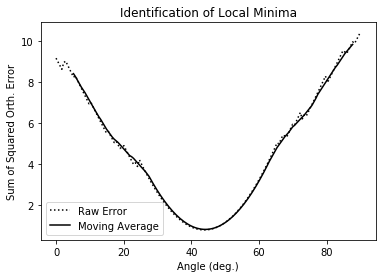

In [7]:
reload(CA)
clusters = CA.lineClustering(evc,kc,plot=True)